<a href="https://colab.research.google.com/github/kvraagul/Machine_Learning/blob/main/Diabetes_Prediction_forFemales(Pima_Indians_Diabetes_Database)SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the datasets

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import accuracy_score

# Loading the datasets

In [70]:
diabetes_data = pd.read_csv("/content/diabetes.zip")

# Data Pre-processing

In [71]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**0 - Not Diabetic**

**1 - Diabetic**

In [72]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [73]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [74]:
diabetes_data.shape

(768, 9)

In [75]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [76]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [77]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [78]:
sns.set()

In [79]:
correlation = diabetes_data.corr()

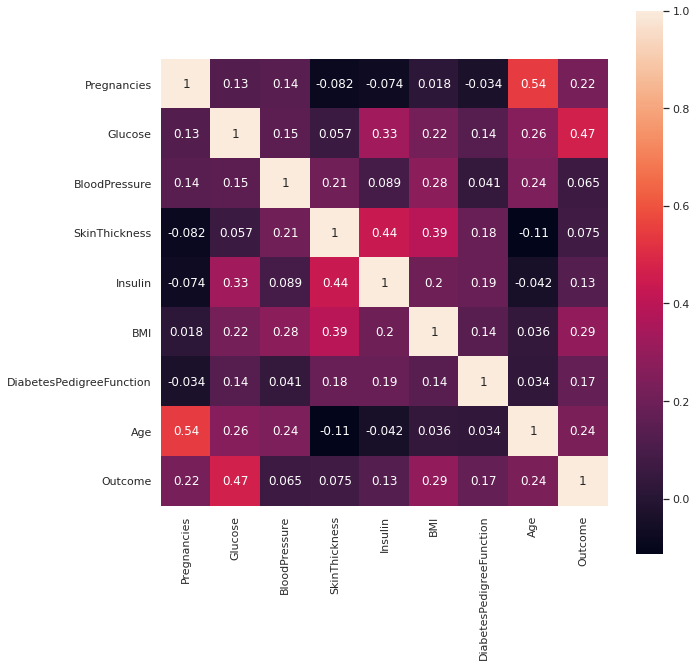

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,square=True,cbar=True)

In [81]:
X = diabetes_data.drop(columns='Outcome',axis=1)
y = diabetes_data['Outcome']

In [82]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [83]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


# train and test split

In [84]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2,random_state=2,stratify=y)

In [85]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


# model creation, evaluation

In [86]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [87]:
train_prediction = classifier.predict(X_train)
train_accuracy = accuracy_score(train_prediction,y_train)
print(f'Accuracy score for training data is {train_accuracy}')

Accuracy score for training data is 0.7866449511400652


In [88]:
test_prediction = classifier.predict(X_test)
test_accuracy = accuracy_score(test_prediction,y_test)
print(f'Accuracy score for test data is {test_accuracy}')

Accuracy score for test data is 0.7727272727272727


# Model Prediction

In [89]:
diabetes_data.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
394,4,158,78,0,0,32.9,0.803,31,1


**Prediction 1**

In [90]:
input_data=(1,140,72,20,120,22,0.243,20)

In [91]:
input_data = np.asarray(input_data)
input_data

array([  1.   , 140.   ,  72.   ,  20.   , 120.   ,  22.   ,   0.243,
        20.   ])

In [92]:
input_data = input_data.reshape(1,-1)

In [93]:
input_data = scalar.transform(input_data)

In [95]:
input_data_pred = classifier.predict(input_data)
print(input_data_pred)

if (input_data_pred[0]==0):
  print('The person is not diabetic')
else:
  print('The persom is diabetic')

[0]
The person is not diabetic


**Prediction 2**

In [97]:
input_data2=(10,150,82,0,0,28,0.603,50)
input_data2 = np.asarray(input_data2).reshape(1,-1)
input_data2 = scalar.transform(input_data2)
input_data2_pred = classifier.predict(input_data2)
print(input_data2_pred)
if (input_data2_pred[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic
